**MLP classifier trained on the MNIST dataset**

# Image classification using the MNIST dataset
We will train and evaluate an MLP on the MNIST dataset. It consists of 70.000 grayscale images of 28x28 pixels each, and there are 10 classes.

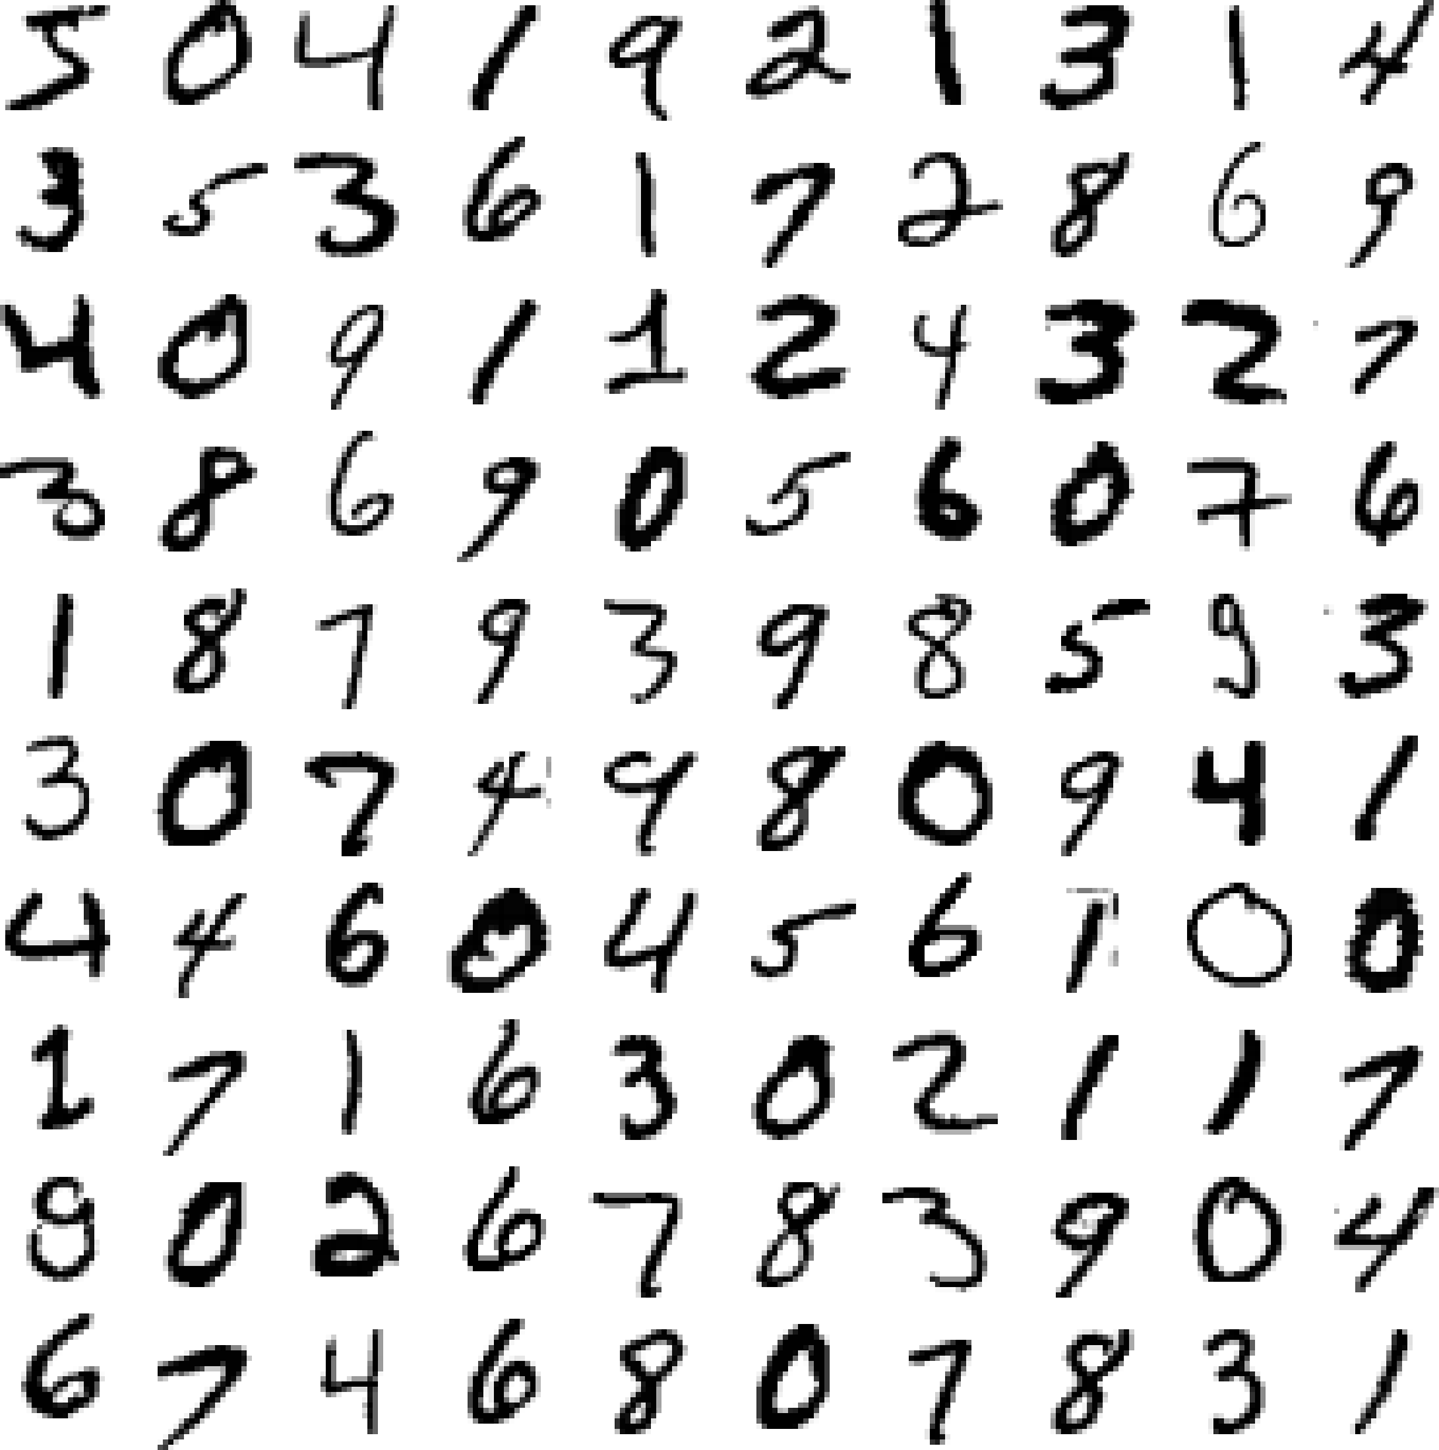

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
# Show the size and dimension of the dataset.
X_train_full.shape

(60000, 28, 28)

In [4]:
# Each pixel intensity is represented as a byte (0 to 255).
X_train_full.dtype

dtype('uint8')

In [5]:
# Split the full training set into a validation set and a (smaller) training set.
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Create a model using the Sequential API

In [6]:
model = keras.models.Sequential()

# Rescaling layer (divides each pixel by 255):
model.add(keras.layers.Rescaling(1./255))

# Input layer:
# A "Flatten" layer converts each input image into a 1-dimensional array.
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden layers:
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer.
# Since it is multiclass classification, we should use the softmax activation function.
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/hk/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model
You must at least specify the loss function and the optimizer to use. You can also specify a list of additional metrics to use during training and evaluation.

In [7]:
# "sparse_categorical_crossentropy" is the loss function to use for classification when the classes are exclusive.
# "sgd" means Stochastic Gradient Descent.
# "accuracy" enables us to measure the accuracy during training and evaluation.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Train the model

In [8]:
# Keras will measure the loss and the extra metrics on the validation set at the end of each epoch.
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.6661 - loss: 1.2022 - val_accuracy: 0.9060 - val_loss: 0.3358
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.9063 - loss: 0.3296 - val_accuracy: 0.9252 - val_loss: 0.2685
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.9221 - loss: 0.2733 - val_accuracy: 0.9368 - val_loss: 0.2252
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.9366 - loss: 0.2314 - val_accuracy: 0.9436 - val_loss: 0.2030
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.9424 - loss: 0.2037 - val_accuracy: 0.9480 - val_loss: 0.1824
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.9469 - loss: 0.1816 - val_accuracy: 0.9540 - val_loss: 0.1675
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.9518 - loss: 0.1664 - val_accuracy: 0.9560 - val_loss: 0.1551
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9566 -

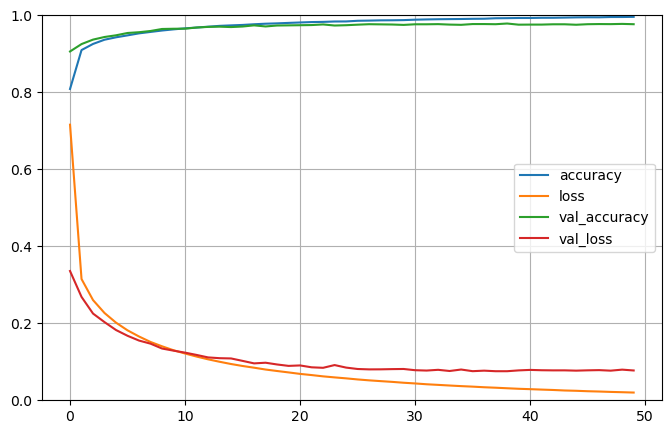

In [9]:
# Show the learning curves.
# (The training curves should be shifted half an epoch to the left to be completely comparable with
# the validation curves).
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model.

In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.9739 - loss: 0.0869


[0.07432521134614944, 0.9782999753952026]

In [24]:
# Make predictions on the whole test set.
# You will see that this predict method returns an array of class probabilities for 
# each prediction.
y_proba = model.predict(X_test)
y_proba.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
# Confusion matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# First convert y_proba to an array where each element is the most probable class from
# each prediction.
y_pred=np.argmax(y_proba,axis=1)

confusion_matrix(y_test, y_pred)

array([[ 966,    0,    1,    2,    1,    1,    2,    3,    3,    1],
       [   0, 1120,    3,    2,    0,    2,    3,    1,    4,    0],
       [   3,    1, 1005,    8,    3,    0,    0,    6,    6,    0],
       [   0,    0,    3,  992,    0,    4,    0,    5,    1,    5],
       [   0,    0,    4,    0,  957,    2,    4,    2,    1,   12],
       [   2,    0,    0,   11,    1,  872,    4,    0,    1,    1],
       [   4,    2,    0,    1,    3,    4,  943,    0,    1,    0],
       [   1,    2,    5,    6,    1,    0,    0, 1003,    3,    7],
       [   4,    1,    1,    8,    2,    3,    4,    2,  946,    3],
       [   5,    2,    0,    7,    8,    1,    0,    6,    1,  979]])

In [26]:
# Precision
precision_score(y_test, y_pred, average=None)

array([0.98071066, 0.9929078 , 0.98336595, 0.95660559, 0.98053279,
       0.98087739, 0.98229167, 0.97568093, 0.97828335, 0.97123016])

In [27]:
# Recall
recall_score(y_test, y_pred, average=None)

array([0.98571429, 0.98678414, 0.97383721, 0.98217822, 0.97454175,
       0.97757848, 0.98434238, 0.97568093, 0.97125257, 0.97026759])

In [28]:
# Make predictions without probabilities.
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred=np.argmax(y_proba,axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([7, 2, 1])

In [29]:
# Check if the predictions were coorrect.
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)